In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import datasets , transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = torchvision.datasets.MNIST('Data', train = True, download = True, transform = transform)
Data = torch.utils.data.DataLoader(train_dataset, batch_size = 512)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/train-images-idx3-ubyte.gz to Data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/train-labels-idx1-ubyte.gz to Data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/t10k-images-idx3-ubyte.gz to Data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to Data/MNIST/raw



In [34]:
test_dataset = torchvision.datasets.MNIST('Data', train = False, download = False, transform = transform)
tData = torch.utils.data.DataLoader(test_dataset, batch_size = 10000)

In [3]:
if torch.cuda.is_available():
  dev = "cuda:0"
else:
  dev = "cpu"
device = torch.device(dev)
print(f"Using {device} device")
print(torch.cuda.get_device_name(torch.cuda.current_device()))

Using cuda:0 device
Tesla T4


In [29]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.C1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.C2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.L1 = nn.Linear(7*7*64, 1000)
    self.L2 = nn.Linear(1000, 100)
    self.L3 = nn.Linear(100, 10)

  def forward(self, x):
    out = self.C1(x)
    out = self.C2(out)
    out = out.reshape(out.size(0), -1)
    out = self.L1(out)
    out = F.relu(out)
    out = self.L2(out)
    out = F.relu(out)
    out = self.L3(out)
    out = F.softmax(out, dim=1)
    return out

In [30]:
NeuralNet = Net()
NeuralNet = NeuralNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(NeuralNet.parameters(), lr=0.01, momentum = 0.9)

In [31]:
epoch=20

In [32]:
l = []
accuracy = []

for i in range(epoch):
  for k, (images, labels) in enumerate(Data):
    images = images.to(device)
    labels = labels.to(device)
    output = NeuralNet(images)
    loss = criterion(output, labels)
    l.append(float(loss))
    total = labels.size(0)
    _, predicted = torch.max(output.data , 1)
    correct = (predicted == labels).sum().item()
    acc = correct*100/total
    accuracy.append(acc)
    if k%10 == 0:
      print(loss)
      print(acc)
      #print(labels)
      #print(guess)
    NeuralNet.zero_grad()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tensor(2.3023, device='cuda:0', grad_fn=<NllLossBackward0>)
14.453125
tensor(2.3014, device='cuda:0', grad_fn=<NllLossBackward0>)
21.875
tensor(2.3001, device='cuda:0', grad_fn=<NllLossBackward0>)
15.0390625
tensor(2.2981, device='cuda:0', grad_fn=<NllLossBackward0>)
15.4296875
tensor(2.2958, device='cuda:0', grad_fn=<NllLossBackward0>)
17.578125
tensor(2.2938, device='cuda:0', grad_fn=<NllLossBackward0>)
20.8984375
tensor(2.2908, device='cuda:0', grad_fn=<NllLossBackward0>)
19.7265625
tensor(2.2866, device='cuda:0', grad_fn=<NllLossBackward0>)
19.921875
tensor(2.2781, device='cuda:0', grad_fn=<NllLossBackward0>)
19.7265625
tensor(2.2691, device='cuda:0', grad_fn=<NllLossBackward0>)
18.9453125
tensor(2.2423, device='cuda:0', grad_fn=<NllLossBackward0>)
16.796875
tensor(2.2077, device='cuda:0', grad_fn=<NllLossBackward0>)
44.921875
tensor(2.1712, device='cuda:0', grad_fn=<NllLossBackward0>)
50.1953125
tensor(2.0762, device='cuda:0', grad_fn=<NllLossBackward0>)
47.8515625
tensor(1.9493, 

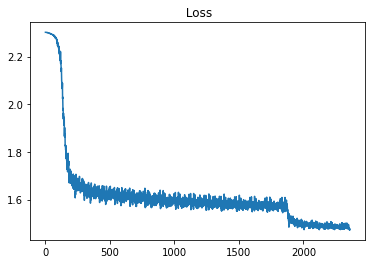

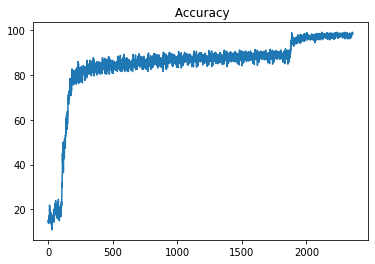

In [33]:
plt.plot(l)
plt.title(" Loss")
plt.show()
plt.plot(accuracy)
plt.title(" Accuracy")
plt.show()

In [37]:
for k, (images, labels) in enumerate(tData):
    images = images.to(device)
    labels = labels.to(device)
    output = NeuralNet(images)
    loss = criterion(output, labels)
    l.append(float(loss))
    total = labels.size(0)
    _, predicted = torch.max(output.data , 1)
    correct = (predicted == labels).sum().item()
acc = correct*100/total
print(acc)


97.41
